In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(units=128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation= tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

model.fit(x_train,y_train, epochs= 10)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

model.save('digits.model')

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0348 - accuracy: 0.9884
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9918
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0215 - accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0159 - accuracy: 0.9947
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0104 - accuracy: 0.9963
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1253

INFO:tensorflow:Assets written to: digits.model\assets


1/1 [==============================] - 0s 71ms/step
The result is probably:3


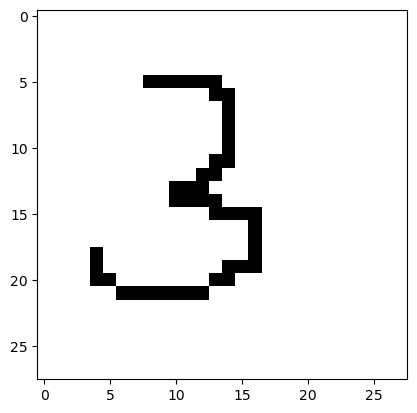

1/1 [==============================] - 0s 31ms/step
The result is probably:4


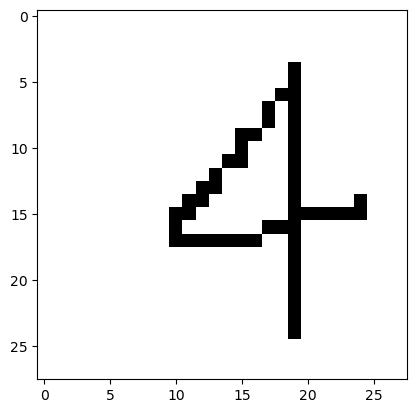

1/1 [==============================] - 0s 31ms/step
The result is probably:3


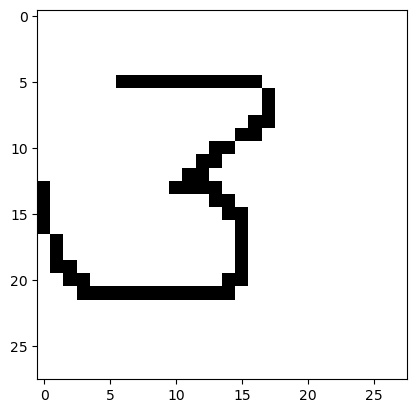

1/1 [==============================] - 0s 28ms/step
The result is probably:2


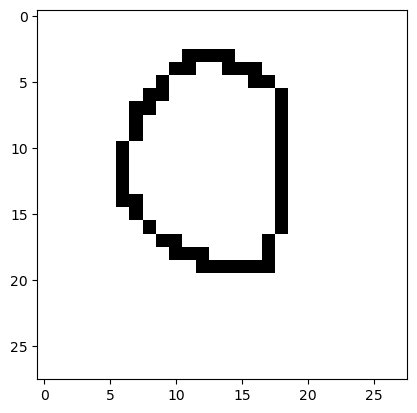

1/1 [==============================] - 0s 42ms/step
The result is probably:0


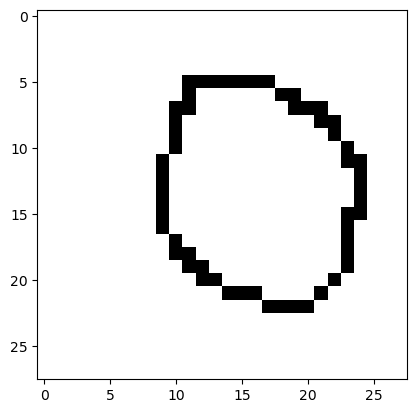

1/1 [==============================] - 0s 43ms/step
The result is probably:9


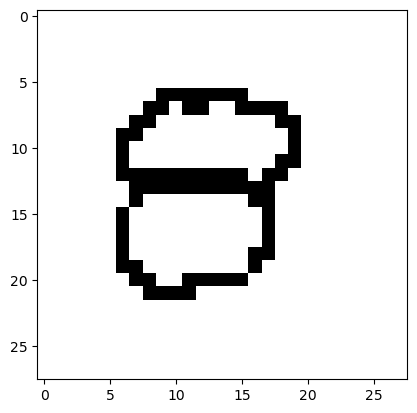

1/1 [==============================] - 0s 63ms/step
The result is probably:2


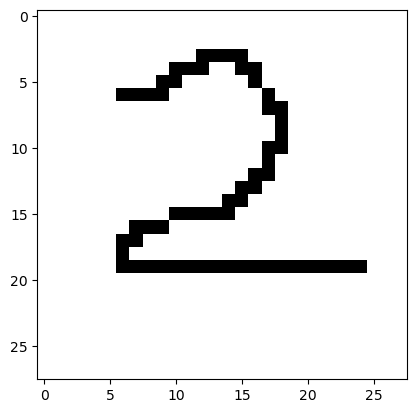

1/1 [==============================] - 0s 36ms/step
The result is probably:1


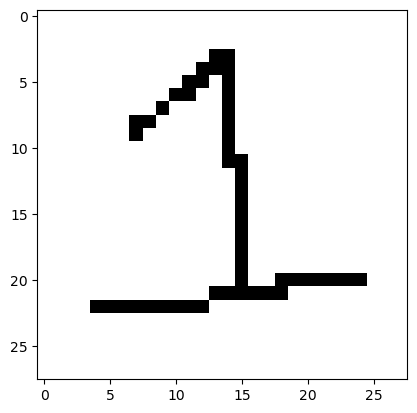

1/1 [==============================] - 0s 54ms/step
The result is probably:3


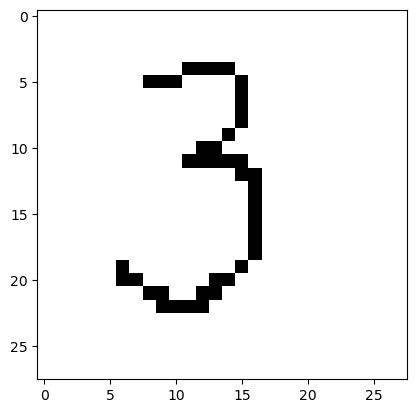

1/1 [==============================] - 0s 35ms/step
The result is probably:5


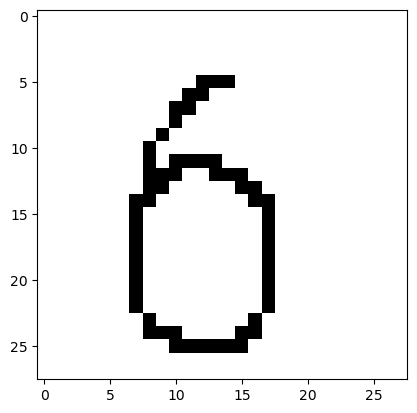

1/1 [==============================] - 0s 38ms/step
The result is probably:1


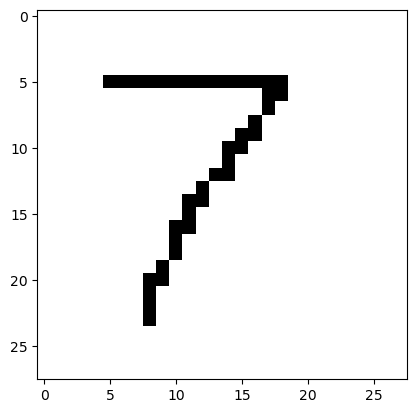

1/1 [==============================] - 0s 40ms/step
The result is probably:2


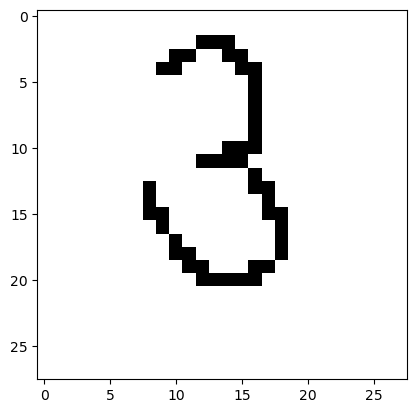

1/1 [==============================] - 0s 44ms/step
The result is probably:2


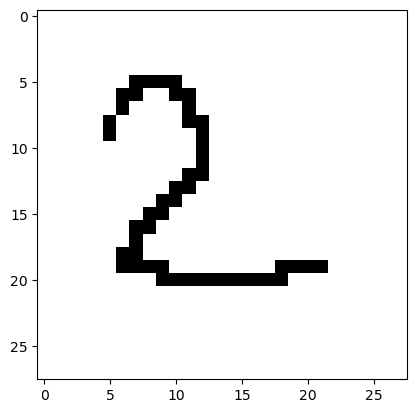

1/1 [==============================] - 0s 29ms/step
The result is probably:7


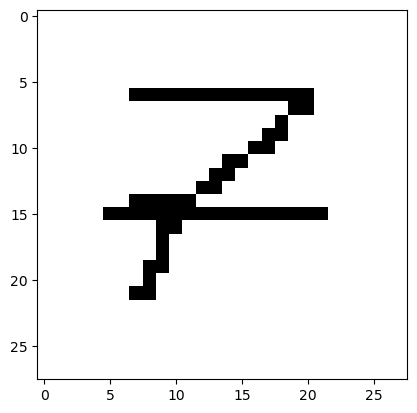

1/1 [==============================] - 0s 35ms/step
The result is probably:8


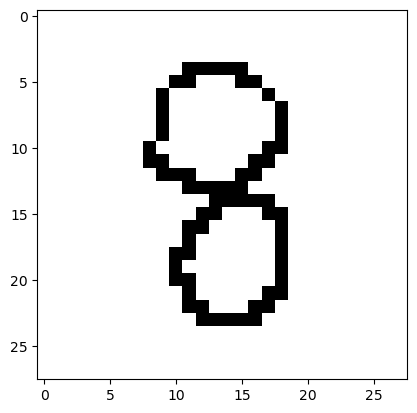

1/1 [==============================] - 0s 27ms/step
The result is probably:4


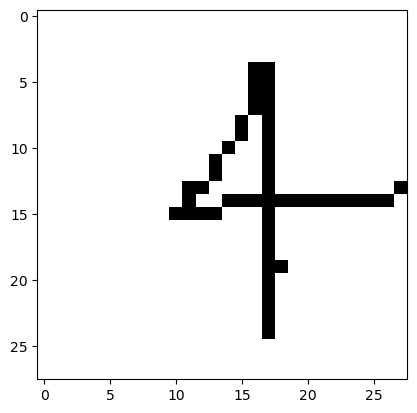

1/1 [==============================] - 0s 29ms/step
The result is probably:5


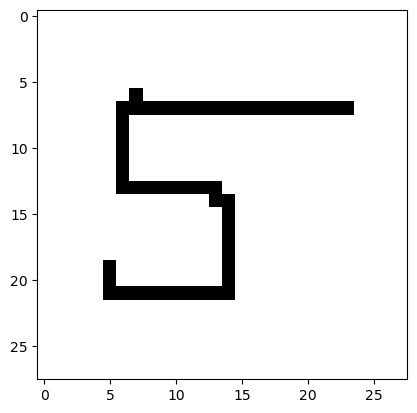

1/1 [==============================] - 0s 43ms/step
The result is probably:6


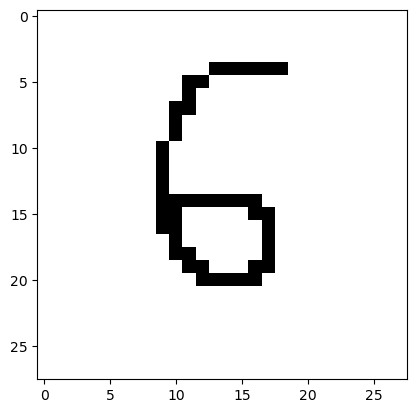

1/1 [==============================] - 0s 40ms/step
The result is probably:4


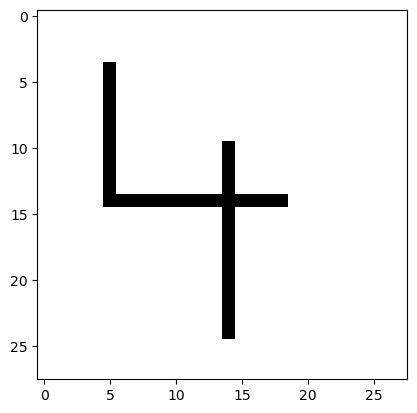

1/1 [==============================] - 0s 29ms/step
The result is probably:8


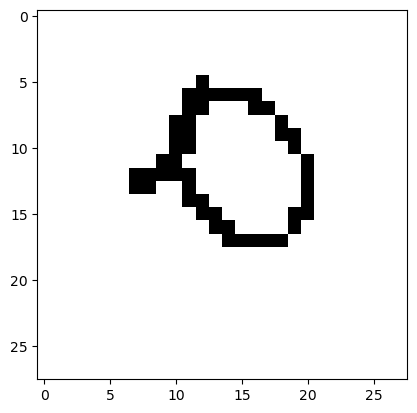

1/1 [==============================] - 0s 28ms/step
The result is probably:8


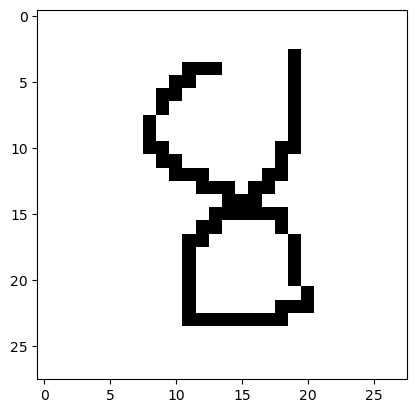

1/1 [==============================] - 0s 39ms/step
The result is probably:7


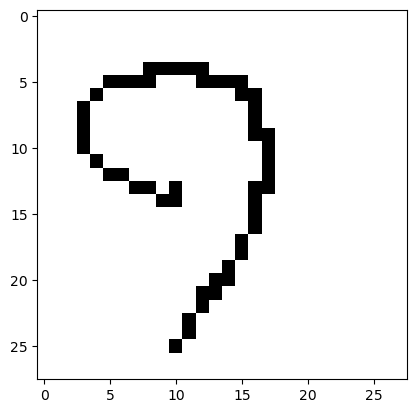

In [12]:
model = tf.keras.models.load_model('digits.model')

for x in range(2,24):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The result is probably:{np.argmax(prediction)}')

    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()